In [28]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [29]:
years = ('2011_12', '2012_13', '2013_14', '2014_15')  # project years

cbsa_shape=gpd.read_file('/Users/anastasiaclark/irs_nyc_migration/data/cb_2016_us_cbsa_500k/cb_2016_us_cbsa_500k.shp')
cbsa_mig=pd.read_csv('/Users/anastasiaclark/irs_nyc_migration/scripts/yrs_2011_2015_ny_mig_by_metro.csv', converters={'cbsa_code':str})
metro_data=cbsa_shape.merge(cbsa_mig, left_on='GEOID',right_on='cbsa_code')
metro_data.to_crs(epsg=5070,inplace=True)

In [30]:
metro_data['coords'] = metro_data['geometry'].apply(lambda x: x.representative_point().coords[:])
metro_data['coords'] = [coords[0] for coords in metro_data['coords']]

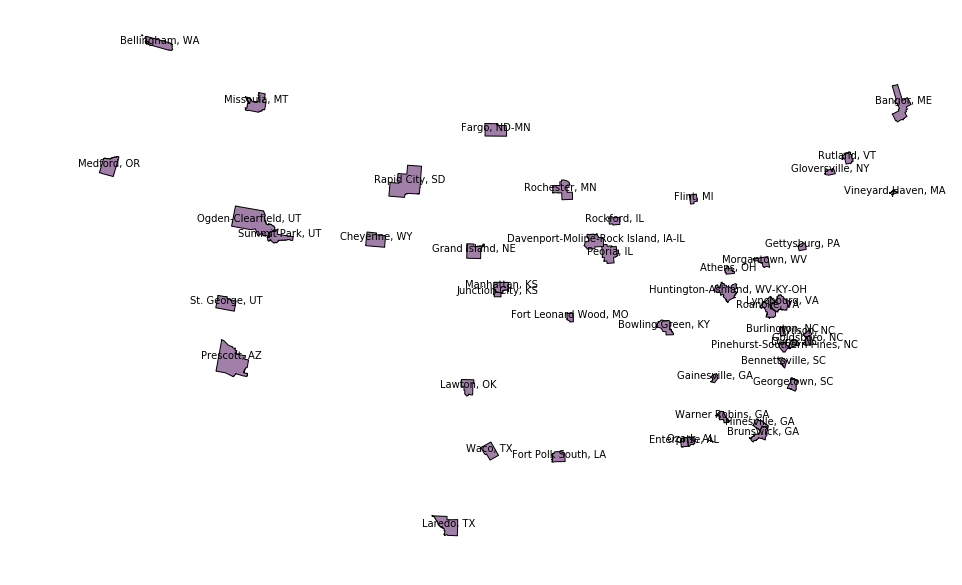

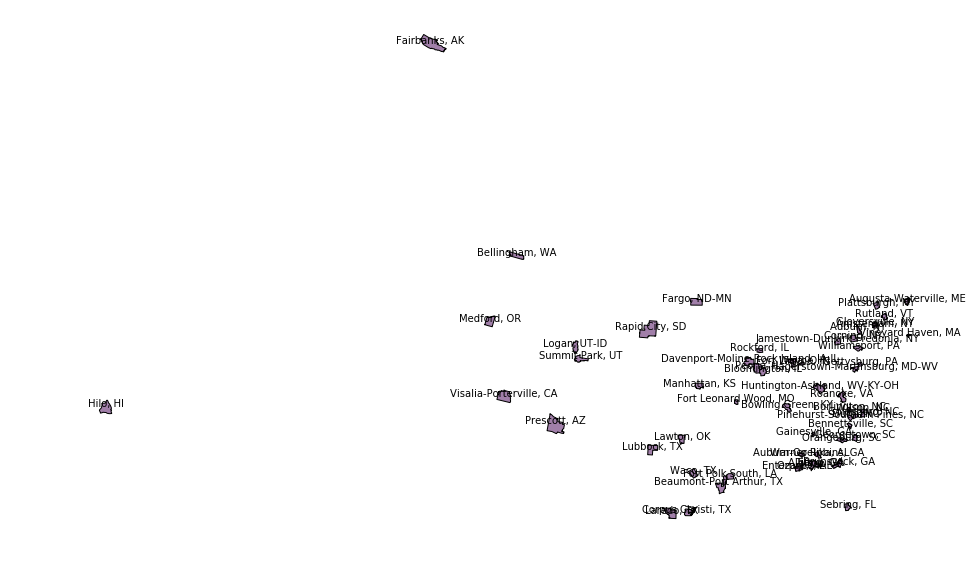

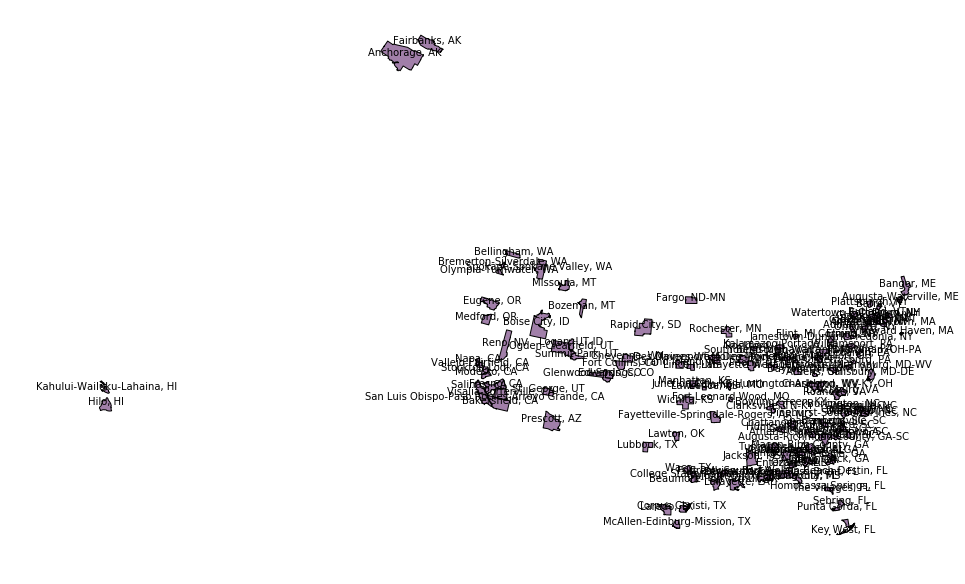

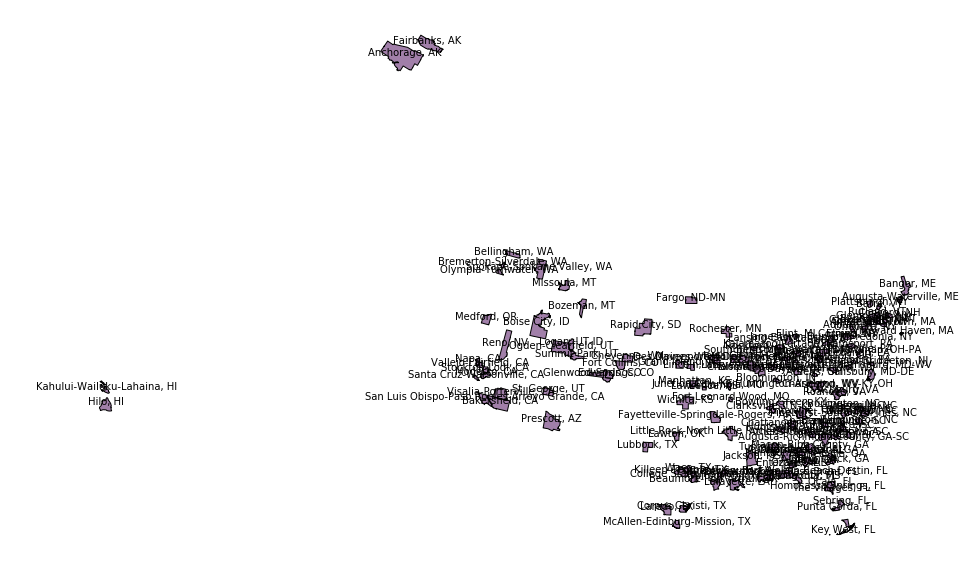

In [31]:
for year in years:
    ax = metro_data[metro_data['inflow{}'.format(year)]==0].plot(column='inflow{}'.format(year), figsize=(16,16))
    ax.axis('off')
    metro_data[metro_data['inflow{}'.format(year)]==0].apply(lambda x: ax.annotate(s=x.NAME, xy=x.coords, ha='center'),axis=1)
    plt.show()

In [36]:
top=metro_data.sort_values('inflow2011_12',ascending=False).head(n=10)

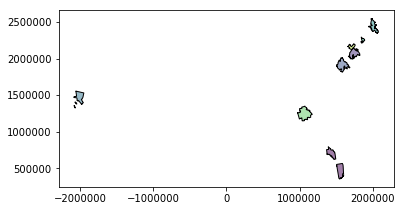

In [37]:
top.plot()